In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse
import jupyterlab
#!pip install torch torchvision
#import torch
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import axes3d

# Case of fully labeled data with two categories (very 'artisanal' procedure)

In [2]:
whole_space_x = np.random.uniform(low=-5., high=6., size=10000)
whole_space_y = np.random.uniform(low=-2., high=8., size=10000)

whole_space = np.vstack((whole_space_x,whole_space_y))
whole_space = np.transpose(whole_space)

In [3]:
cov_blue = np.vstack(([1/8,0],[0,1/4]))
mean_blue = np.array(([0,0]))

In [4]:
cov_red = np.vstack(([2,0],[0,1/2]))
mean_red = np.array(([1,2]))

In [5]:
gaussian_blue = np.random.multivariate_normal(mean=mean_blue, cov=cov_blue, size=100)
gaussian_red = np.random.multivariate_normal(mean=mean_red, cov=cov_red, size=100)

In [6]:
ellipse_red = Ellipse(xy=(1,2), width=2*np.sqrt(2), height=2*np.sqrt(1/2),
                      edgecolor='r', fc='None', lw=1)
ellipse_blue=Ellipse(xy=(0,0), width=2*np.sqrt(1/8), height=2*np.sqrt(1/4),
                     edgecolor='b', fc='None', lw=1)

/tmp/ipykernel_254/1613248164.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_254/1613248164.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_254/1613248164.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)
/tmp/ipykernel_254/1613248164.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt strin

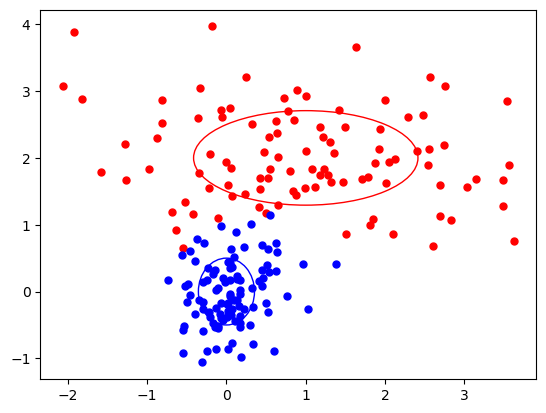

In [7]:
plt.figure()
plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)
ax = plt.gca()
ax.add_patch(ellipse_blue)
ax.add_patch(ellipse_red)

In [8]:
label_1 = np.ones(100)
label_0 = np.zeros(100)
label_1 = label_1[:,np.newaxis]
label_0 = label_0[:,np.newaxis]

In [9]:
red_data = np.concatenate((gaussian_red, label_1), axis=1)

In [10]:
blue_data = np.concatenate((gaussian_blue, label_0), axis=1)

In [11]:
whole_data = np.vstack((red_data, blue_data))

In [12]:
whole_data = pd.DataFrame(whole_data) #in order to be able to order later or select sepcific columns and values

In [13]:
mean_blue = np.mean(blue_data[:,:2], axis=0)
mean_red = np.mean(red_data[:,:2], axis=0)

In [14]:
cov_blue = np.cov(blue_data[:,:2], rowvar=False)
cov_red = np.cov(red_data[:,:2], rowvar=False)

In [15]:
def classifier_values(m, pi_m, mu_hat_m, sigma_hat_m,x_test):
    """compute the conditional density of y for a certain m given x

    Parameters:
    --------------------------
    m: int
    the class of y
    
    pi_m: float
    the probability of y belonging to the class

    mu_hat_m : array-like object
    the mean of the x's that have a y in the class m

    sigma_hat_m: 2-D array-like object
    the estimated covariance matrix for a certain class

    x_test: array-like object
    test input
    -------------------------
    """
    y = np.log(pi_m) + multivariate_normal.logpdf(x=x_test, mean=mu_hat_m, cov=sigma_hat_m)
    return y

In [16]:
#for the blue ones
dens_for_blue = np.zeros(10000)
for i in range(10000):
    dens_for_blue[i] = classifier_values(m=0,pi_m=1/2,
                                         mu_hat_m=mean_blue,sigma_hat_m=cov_blue,
                                         x_test=whole_space[i,:])

#for the red ones
dens_for_red = np.zeros(10000)
for i in range(10000):
    dens_for_red[i] = classifier_values(m=1,pi_m=1/2,
                                         mu_hat_m=mean_red,sigma_hat_m=cov_red,
                                         x_test=whole_space[i,:])

In [17]:
all_output = np.vstack((dens_for_blue,dens_for_red))
all_output = np.transpose(all_output)

In [18]:
retained_blue = np.empty(shape=(0,2))
retained_red = np.empty(shape=(0,2))

In [19]:
for i in range(10000):
    if all_output[i,0]>all_output[i,1]:
        retained_blue = np.vstack((retained_blue, whole_space[i,:]))
    else:
        retained_red = np.vstack((retained_red, whole_space[i,:]))

/tmp/ipykernel_254/667839963.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_254/667839963.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_254/667839963.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)
/tmp/ipykernel_254/667839963.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b

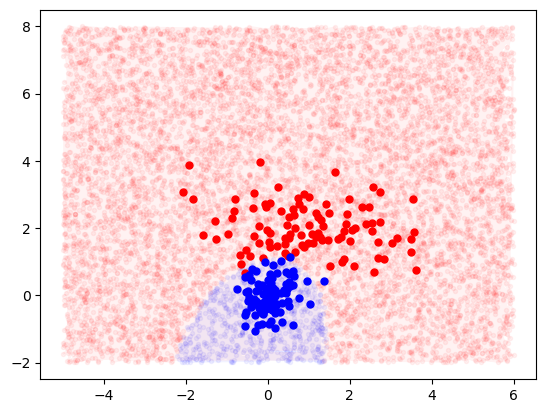

In [20]:
plt.plot(retained_blue[:,0], retained_blue[:,1], alpha=0.05, marker='.', color='b')
plt.plot(retained_red[:,0], retained_red[:,1], alpha=0.05, marker='.', color='r')
plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)

# Case of fully labeled data, mulmtiple categories

In [21]:
cov_1 = np.vstack(([1/8,0],[0,1/4]))
mean_1 = np.array(([2,0]))
cov_2 = np.vstack(([2,0],[0,1/2]))
mean_2 = np.array(([3,6]))
cov_3 = np.vstack(([1,0],[0,2]))
mean_3 = np.array(([-2,4]))
cov_4 = np.vstack(([1/8,0],[0,1/16]))
mean_4 = np.array(([-2,0]))

In [22]:
gaussian_1 = np.random.multivariate_normal(mean=mean_1, cov=cov_1, size=100)
gaussian_2 = np.random.multivariate_normal(mean=mean_2, cov=cov_2, size=100)
gaussian_3 = np.random.multivariate_normal(mean=mean_3, cov=cov_3, size=100)
gaussian_4 = np.random.multivariate_normal(mean=mean_4, cov=cov_4, size=100)

In [23]:
list_of_cols = ['b','r','g','m']

In [24]:
list_labeled = [gaussian_1,gaussian_2,gaussian_3,gaussian_4]

/tmp/ipykernel_254/1460800915.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)
/tmp/ipykernel_254/1460800915.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)


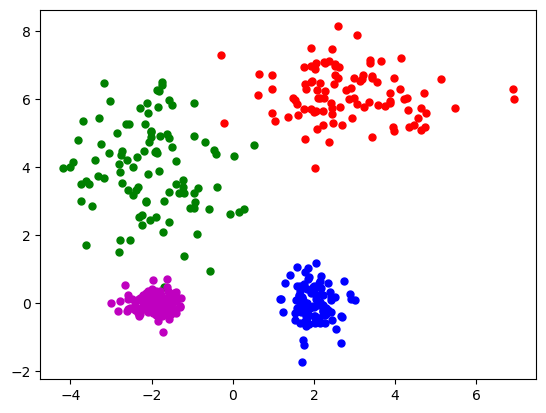

In [25]:
for i in range(4):
    gaussian_distrib = list_labeled[i]
    plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)

In [26]:
parameters_estimated = {}
for i in range(4):
    parameters_estimated['mean_{0}'.format(i)] = np.mean(list_labeled[i][:,:], axis=0)
    parameters_estimated['cov_{0}'.format(i)] = np.cov(list_labeled[i][:,:], rowvar=False)

In [27]:
y_values = {}
for category in range(4):
    list_of_output = []
    for i in range(10000):
        y = classifier_values(m=i, pi_m=1/4,
                              mu_hat_m=parameters_estimated[f'mean_{category}'],
                              sigma_hat_m=parameters_estimated[f'cov_{category}'],x_test=whole_space[i,:])
        list_of_output.append(y)
        
    y_values['class_{0}'.format(category)] = list_of_output

In [28]:
total_output = np.zeros((10000,4))

In [29]:
for category in range(4):
    for i in range(10000):
        total_output[i,category] = y_values[f'class_{category}'][i]

In [30]:
total_output

array([[-125.51843308,  -65.61454427,  -12.208623  ,  -16.20325969],
       [ -99.41689304,   -5.01605885,  -11.56899309, -395.23397378],
       [-143.6562545 ,  -79.44126086,  -15.60205826,  -34.87997643],
       ...,
       [ -49.32562267,  -36.44379031,   -6.11685017,   -7.81285338],
       [  -6.15423804,  -45.28215427,  -12.09185023,  -31.4234264 ],
       [-105.04939393,   -3.88612106,  -25.06536709, -425.39136091]])

In [31]:
retained_dict = {'0':[], '1':[], '2':[], '3':[]}
for i in range(10000):
    values = total_output[i,:]
    llmax = np.max(values)
    retained_dict[str(np.where(values == llmax)[0][0])].append(whole_space[i,:])
    

In [32]:
to_plot_0 = np.empty((len(retained_dict['0']),2))
to_plot_1 = np.empty((len(retained_dict['1']),2))
to_plot_2 = np.empty((len(retained_dict['2']),2))
to_plot_3 = np.empty((len(retained_dict['3']),2))
for i in range(len(retained_dict['0'])):
    to_plot_0[i] = retained_dict[str(0)][i]
for i in range(len(retained_dict['1'])):
    to_plot_1[i] = retained_dict[str(1)][i]
for i in range(len(retained_dict['2'])):
    to_plot_2[i] = retained_dict[str(2)][i]
for i in range(len(retained_dict['3'])):
    to_plot_3[i] = retained_dict[str(3)][i]

/tmp/ipykernel_254/3015894690.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)
/tmp/ipykernel_254/3015894690.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)


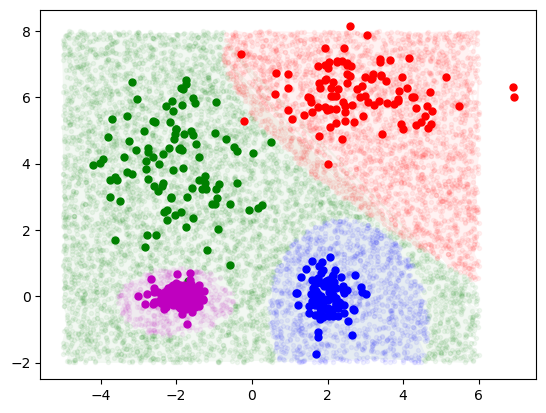

In [33]:
plt.plot(to_plot_0[:,0], to_plot_0[:,1], alpha=0.05, marker='.', color='b')
plt.plot(to_plot_1[:,0], to_plot_1[:,1], alpha=0.05, marker='.', color='r')
plt.plot(to_plot_2[:,0], to_plot_2[:,1], alpha=0.05, marker='.', color='g')
plt.plot(to_plot_3[:,0], to_plot_3[:,1], alpha=0.05, marker='.', color='m')
for i in range(4):
    gaussian_distrib = list_labeled[i]
    plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)

In [34]:
parameters_estimated

{'mean_0': array([ 1.97729577, -0.01466097]),
 'cov_0': array([[ 0.13629999, -0.01491177],
        [-0.01491177,  0.26665332]]),
 'mean_1': array([2.82373969, 6.13795289]),
 'cov_1': array([[ 1.64748139, -0.09112952],
        [-0.09112952,  0.54377869]]),
 'mean_2': array([-2.0326411 ,  3.93864942]),
 'cov_2': array([[ 1.07044183, -0.15784546],
        [-0.15784546,  1.72035653]]),
 'mean_3': array([-1.96334806,  0.00781685]),
 'cov_3': array([[0.14379542, 0.00295987],
        [0.00295987, 0.068821  ]])}

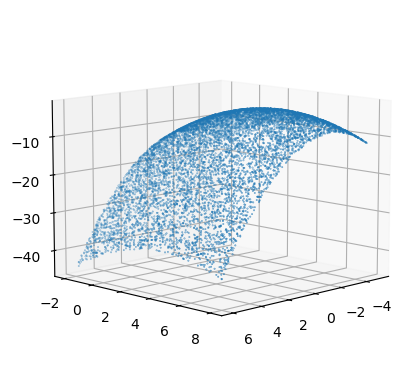

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(whole_space_x,whole_space_y,
           classifier_values(m=1,pi_m=1/4,mu_hat_m=mean_3, sigma_hat_m=cov_3, x_test=whole_space),
           s = 0.1)
ax.view_init(10, 45) 

In [36]:
x_axis = np.ones(1000)*(-2)
y_axis = np.ones(1000)*(4)
z_axis = np.linspace(start=-1,stop=250,num=1000)

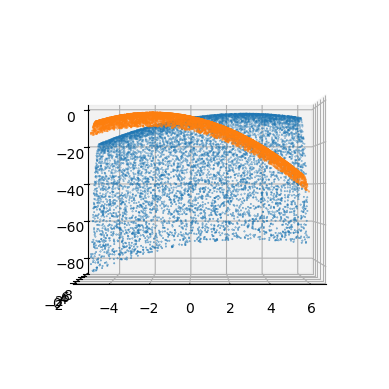

In [37]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(whole_space_x,whole_space_y,
           classifier_values(m=1,pi_m=1/4,mu_hat_m=mean_2, sigma_hat_m=cov_2, x_test=whole_space),
           s = 0.1)
ax.scatter(whole_space_x,whole_space_y,
           classifier_values(m=1,pi_m=1/4,mu_hat_m=mean_3, sigma_hat_m=cov_3, x_test=whole_space),
           s = 0.1)
#ax.scatter(x_axis,y_axis,z_axis,s = 0.1)
ax.view_init(0, 270)

# Case of unlabeled data

In [38]:
mean_lab_0 = np.array([0,0])
cov_lab_0 = np.vstack(([1/8,0],[0,1/2]))
mean_lab_1 = np.array([1,3])
cov_lab_1 = np.vstack(([2,0],[0,1]))

In [39]:
labeled_0 = np.random.multivariate_normal(mean=mean_lab_0, cov=cov_lab_0, size=10)
unlabeled_0 = np.random.multivariate_normal(mean=mean_lab_0, cov=cov_lab_0, size=100)
labeled_1 = np.random.multivariate_normal(mean=mean_lab_1, cov=cov_lab_1, size=10)
unlabeled_1 = np.random.multivariate_normal(mean=mean_lab_1, cov=cov_lab_1, size=100)

In [40]:
label_0 = np.zeros(10)
label_1 = np.ones(10)

In [41]:
full_labeled = np.vstack((labeled_0,labeled_1))

In [42]:
df_full_label = pd.DataFrame(full_labeled)

In [43]:
all_labels = np.hstack((label_0,label_1))

In [44]:
df_all_labels = pd.DataFrame(all_labels)

In [45]:
labeled_data = pd.concat([df_full_label, df_all_labels], axis=1)

In [46]:
full_unlabeled = np.vstack((unlabeled_0, unlabeled_1))

In [47]:
df_full_unlabeled = pd.DataFrame(full_unlabeled)

In [48]:
df_full_unlabeled['label']=np.ones(200)*99

In [49]:
labeled_data.columns = ['x_1', 'x_2', 'label']

In [50]:
df_full_unlabeled.columns = ['x_1', 'x_2', 'label']

In [51]:
whole_data = pd.concat([labeled_data,df_full_unlabeled])

In [52]:
colors = {0:'blue', 1:'red', 99:'grey'}
color_list = [colors[group] for group in whole_data['label']]

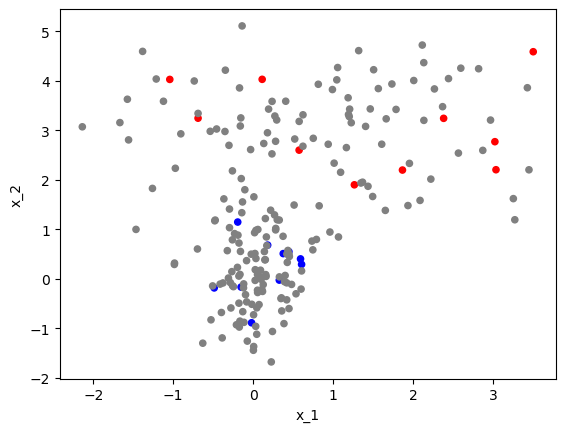

In [53]:
ax = whole_data.plot.scatter('x_1','x_2', c=color_list)

In [54]:
estimated_mean_0 = np.mean(labeled_0, axis=0)
estimated_cov_0 = np.cov(labeled_0, rowvar=False)
estimated_mean_1 = np.mean(labeled_1, axis=0)
estimated_cov_1 = np.cov(labeled_1, rowvar=False)

pseudo code : 
$p(y=1 \vert \textbf{x}_{\star})$ = $\frac{\hat{\pi}_1\mathcal{N}(\textbf{x}_{\star}\vert \hat{\mu}_1,\hat{\Sigma}_1)}{\text{sum}}$

In [56]:
whole_data = pd.concat([labeled_data, df_full_unlabeled], axis=0)

In [65]:
whole_data.reset_index(drop=True)

,x_1,x_2,label
0,-0.193472,1.148883,0.0
1,-0.151793,-0.164425,0.0
2,0.446688,0.550640,0.0
3,0.591948,0.404613,0.0
4,-0.020392,-0.885863,0.0
...,...,...,...
215,-0.161149,3.089522,99.0
216,0.294129,3.211103,99.0
217,-0.259832,2.182773,99.0
218,1.045636,4.021704,99.0


In [62]:
weights = np.ones((220,5))

In [58]:
for i in range(whole_data.shape[0]):
    weights[i,0] = whole_data['x_1'][i]
    weights[i,1] = whole_data['x_2'][i]
    if whole_data['label'] == 1:
        weights[i,2] = 1
        weights[i,3] = 0
    elif whole

(220, 3)

### so we define our matrix weights as it follows : 
The two first columns are for the data, their coordinates. 
The third one is for the weights for the category 0.
The fourth, for the weights for the category 1.
The fifth will be updated at the end to 'conclude' the predictions, it will contain the label predicted.

In [ ]:
whole_data['label'